In [1]:
import pandas as pd

In [2]:
df_ROS=pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0


In [3]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

### ✡️데이터 핸들링☯️
- 정렬 : df.sort_values(by=['',''], ascending=[False, False])
- 추출 
    - 열 단위 추출: df[['','']]
    - 행 단위 추출: iloc[:, :], head(), tail()
- 필터 : df.loc[conditions]
- 요약 : df_sales.pivot_table(index='종류', values='가격', aggfunc=np.max)
    - index : group by
    - values: 대상 컬럼명
    - aggfunc : 
### 환자 대상 분석
0. 변수 구조 확인
1. 목표변수 설정 : '재발여부'
2. 설명변수 설정 : 


In [4]:
# 변수 구조 확인

df_ROS.columns 

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [5]:
# 원하는 컬럼만 추출
# '성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형', '재발여부'

forpatient_df_ROS=df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형', '재발여부']]
forpatient_df_ROS.head(4)

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
1,1,171,0,71.7,0,47,운동선수,RH+A,0
2,1,178,0,77.1,0,39,특수전문직,RH+B,0
3,1,174,0,74.2,0,40,주부,RH+O,0


In [6]:
# 행단위 추출
# iloc[:, :], head(), tail()
forpatient_df_ROS.iloc[:4]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
1,1,171,0,71.7,0,47,운동선수,RH+A,0
2,1,178,0,77.1,0,39,특수전문직,RH+B,0
3,1,174,0,74.2,0,40,주부,RH+O,0


In [7]:
forpatient_df_ROS.iloc[0:3]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
1,1,171,0,71.7,0,47,운동선수,RH+A,0
2,1,178,0,77.1,0,39,특수전문직,RH+B,0


### index 관련 사항

In [8]:
# Unique한 컬럼
df_ROS.set_index('환자ID')

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
환자ID,,,,,,,,,,,,,,,,,,,,,
1PT,0,22.8,3,51.0,0.0,0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
2PT,1,44.9,4,26.0,0.0,0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
3PT,2,53.0,3,NaN,0.0,0,0,1,0,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
4PT,3,54.7,4,18.0,0.0,0,1,0,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
5PT,4,53.8,4,NaN,0.0,0,1,0,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890PT,1889,44.0,1,NaN,0.0,0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1891PT,1890,30.8,2,NaN,0.0,0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1892PT,1891,36.7,3,NaN,0.0,0,0,0,0,1,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0


In [9]:
# Unique 하지 않은 컬럼
df_ROS.set_index('성별')

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
성별,,,,,,,,,,,,,,,,,,,,,
2,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
1,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
1,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
1,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
2,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0


In [10]:
forpatient_df_ROS.sort_values(by=['신장'])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1763,2,140,1,35.0,0,86,무직,RH+O,0
896,2,140,0,35.0,0,48,NaN,RH+A,0
348,2,142,0,52.9,0,38,자영업,RH+A,0
70,2,143,0,53.3,0,31,사무직,RH+O,0
974,2,143,0,56.0,0,56,무직,RH+O,0
...,...,...,...,...,...,...,...,...,...
202,1,189,0,85.3,0,22,군인,RH+B,0
464,1,189,0,85.9,0,39,자영업,RH+A,0
1227,1,190,0,74.0,0,47,자영업,RH+O,0
1246,1,191,0,114.0,0,17,학생,RH+O,0


In [11]:
forpatient_df_ROS.sort_values(by=['신장'], ascending=[False])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1579,1,204,0,103.0,0,39,교사,RH+O,1
1246,1,191,0,114.0,0,17,학생,RH+O,0
1227,1,190,0,74.0,0,47,자영업,RH+O,0
464,1,189,0,85.9,0,39,자영업,RH+A,0
202,1,189,0,85.3,0,22,군인,RH+B,0
...,...,...,...,...,...,...,...,...,...
70,2,143,0,53.3,0,31,사무직,RH+O,0
974,2,143,0,56.0,0,56,무직,RH+O,0
348,2,142,0,52.9,0,38,자영업,RH+A,0
1763,2,140,1,35.0,0,86,무직,RH+O,0


In [12]:
forpatient_df_ROS.sort_values(by=['신장', '체중'], ascending=[False, False])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1579,1,204,0,103.0,0,39,교사,RH+O,1
1246,1,191,0,114.0,0,17,학생,RH+O,0
1227,1,190,0,74.0,0,47,자영업,RH+O,0
464,1,189,0,85.9,0,39,자영업,RH+A,0
202,1,189,0,85.3,0,22,군인,RH+B,0
...,...,...,...,...,...,...,...,...,...
974,2,143,0,56.0,0,56,무직,RH+O,0
70,2,143,0,53.3,0,31,사무직,RH+O,0
348,2,142,0,52.9,0,38,자영업,RH+A,0
896,2,140,0,35.0,0,48,NaN,RH+A,0


### 데이터 타입 변환
#### Class 2023-08-11
- int, float => str(object)
- object => int or float(소수점 있을 경우)

In [13]:
forpatient_df_ROS.dtypes

성별         int64
신장         int64
심혈관질환      int64
체중       float64
흡연여부       int64
연령         int64
직업        object
혈액형       object
재발여부       int64
dtype: object

In [57]:
forpatient_df_ROS.loc['재발여부'] = forpatient_df_ROS['재발여부'].astype(str)

In [59]:
forpatient_df_ROS.loc['성별'] = forpatient_df_ROS['성별'].astype(str)

In [62]:
forpatient_df_ROS.loc['심혈관질환'] = forpatient_df_ROS['심혈관질환'].astype(str)

In [61]:
forpatient_df_ROS.dtypes

성별       object
신장       object
심혈관질환    object
체중       object
흡연여부     object
연령       object
직업       object
혈액형      object
재발여부     object
dtype: object

In [19]:
con_list=forpatient_df_ROS.describe().columns.to_list()
con_list

['신장', '체중', '연령']

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns

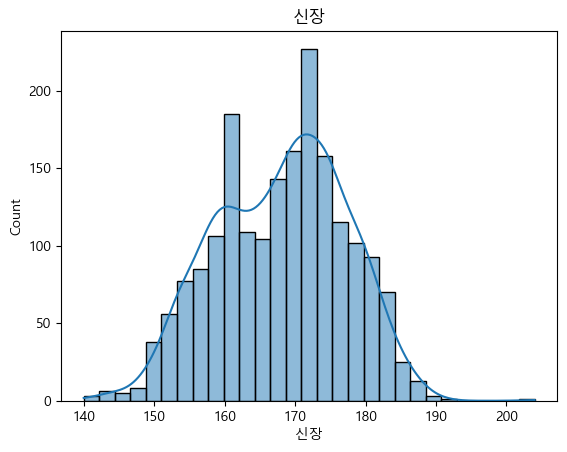

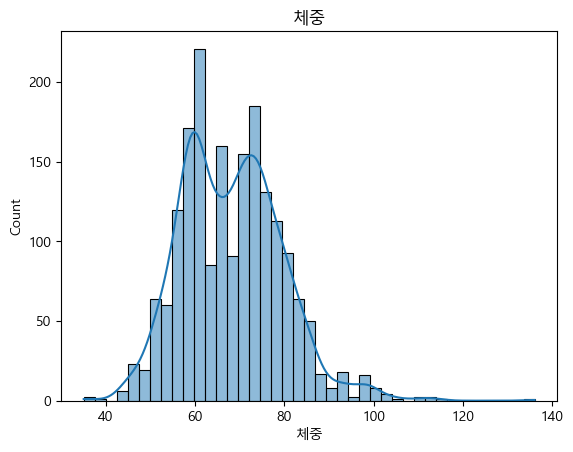

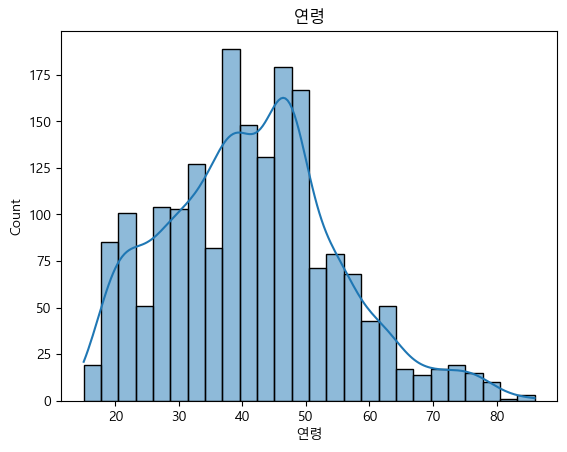

In [21]:
for con_value in con_list :
    sns.histplot(forpatient_df_ROS,x=con_value,kde=True)
    plt.title(con_value)
    plt.show()

### quest 1
- 정렬 : 혈액형(ascending), 직업(descending)
- 추출 : 혈액형, 직업, 성별

In [22]:
quest_df_ROS=forpatient_df_ROS[['혈액형', '직업', '성별']]

In [23]:
quest_df_ROS=quest_df_ROS.sort_values(by=['혈액형', '직업'], ascending=[True, False])

In [24]:
quest_df_ROS.iloc[:5]

,혈액형,직업,성별
60,RH+A,학생,1
176,RH+A,학생,1
184,RH+A,학생,2
224,RH+A,학생,2
272,RH+A,학생,1


In [25]:
quest_df_ROS.iloc[600:700] #ascending, descending 적용 잘 보이는 구간 표시

,혈액형,직업,성별
477,RH+A,NaN,2
478,RH+A,NaN,2
480,RH+A,NaN,1
481,RH+A,NaN,2
484,RH+A,NaN,2
...,...,...,...
1661,RH+AB,학생,2
1709,RH+AB,학생,1
1741,RH+AB,학생,1
1189,RH+AB,특수전문직,1


### quest 2
- 직업군이 상위 2위에 속하는 항목 : value_count, DataFrame
- 체중>70, 신장>170, 흡연여부 x
- 해당 레코드 개수 표현 

In [26]:
series_job_ROS=df_ROS['직업'].value_counts()
series_job_ROS

사무직      449
자영업      171
무직       164
학생       135
주부       114
군인        90
공무원       51
운수업       50
노동직       42
농업        40
의료직       40
사업가       39
교사        30
특수전문직     23
건설업       17
운동선수      14
예술가       10
Name: 직업, dtype: int64

In [27]:
series_job_ROS.index

Index(['사무직', '자영업', '무직', '학생', '주부', '군인', '공무원', '운수업', '노동직', '농업', '의료직',
       '사업가', '교사', '특수전문직', '건설업', '운동선수', '예술가'],
      dtype='object')

In [28]:
list_job_ROS=list(series_job_ROS.index)
list_job_ROS

['사무직',
 '자영업',
 '무직',
 '학생',
 '주부',
 '군인',
 '공무원',
 '운수업',
 '노동직',
 '농업',
 '의료직',
 '사업가',
 '교사',
 '특수전문직',
 '건설업',
 '운동선수',
 '예술가']

In [29]:
job_top2_condition= (df_ROS['직업']==list_job_ROS[0]) | (df_ROS['직업']==list_job_ROS[1])
job_top2_condition

0        True
1       False
2       False
3       False
4       False
        ...  
1889    False
1890     True
1891    False
1892     True
1893     True
Name: 직업, Length: 1894, dtype: bool

In [30]:
job_top2_df_ROS=df_ROS.loc[job_top2_condition]
job_top2_df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
5,5,6PT,28.5,3,NaN,0.0,0,0,2,0,...,0,41.8,23.6,8.8,0,-0.95,1937.5,4,Down,0
11,11,12PT,53.2,3,39.0,0.0,0,0,0,0,...,2,37.2,8.9,13.5,1,-1.35,2119.3,4,Middle,0
23,23,24PT,28.5,3,NaN,0.0,0,1,0,0,...,0,41.8,20.8,10.3,1,-1.69,2205.2,4,Down,0
30,30,31PT,51.1,3,NaN,0.0,0,0,0,0,...,0,45.3,14.9,20.2,0,-1.64,1833.2,4,Middle,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1883,1884PT,25.4,3,NaN,0.0,0,1,0,0,...,0,55.2,25.1,11.5,0,NaN,2381.2,4,Down,0
1888,1888,1889PT,42.4,3,NaN,0.0,0,0,0,0,...,0,54.2,21.3,6.8,1,NaN,2421.3,3,Down,0
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.8,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.5,5,Down,0


In [31]:
drd_jt_ROS=job_top2_df_ROS[['직업', '체중', '신장', '흡연여부']]
drd_jt_ROS

,직업,체중,신장,흡연여부
0,자영업,60.3,163,0
5,자영업,60.8,164,1
11,자영업,64.9,162,0
23,사무직,77.8,179,0
30,사무직,73.3,173,0
...,...,...,...,...
1883,자영업,66.0,174,0
1888,자영업,63.0,165,0
1890,사무직,59.0,157,0
1892,사무직,77.0,177,0


In [32]:
quest_condition = (drd_jt_ROS['체중']>70)  & (drd_jt_ROS['신장']>170) & (drd_jt_ROS['흡연여부']==0)
quest_condition

0       False
5       False
11      False
23       True
30       True
        ...  
1883    False
1888    False
1890    False
1892     True
1893    False
Length: 620, dtype: bool

In [33]:
result_ROS=drd_jt_ROS.loc[quest_condition] #164 rows
result_ROS

,직업,체중,신장,흡연여부
23,사무직,77.8,179,0
30,사무직,73.3,173,0
40,사무직,80.2,182,0
53,사무직,82.7,185,0
72,자영업,72.1,171,0
...,...,...,...,...
1830,자영업,80.0,176,0
1841,자영업,99.0,175,0
1855,사무직,74.0,187,0
1871,사무직,82.0,177,0


In [34]:
result_ROS.shape[0] #개수 표현..?

164

In [35]:
len(result_ROS)

164

In [36]:
# list(df_ROS_forpatient['직업'].value_counts().iloc[:2].index)
# df_ROS_forpatient['직업'].value_counts().iloc[:2].index)

### quest 3
- quest2 최종 데이터 사용
- 직업별 성별 빈도 : np.size
- 직업별 혈액형 빈도 : np.size

In [37]:
# quest2 최종데이터와 같은 조건의 DataFrame 생성
q3_jt_ROS=job_top2_df_ROS[['직업', '체중', '신장', '흡연여부', '성별', '혈액형']]
q3_condition = (q3_jt_ROS['체중']>70)  & (q3_jt_ROS['신장']>170) & (q3_jt_ROS['흡연여부']==0)
q3_df_ROS=q3_jt_ROS.loc[quest_condition]
q3_df_ROS # 164 rows

,직업,체중,신장,흡연여부,성별,혈액형
23,사무직,77.8,179,0,1,RH+B
30,사무직,73.3,173,0,1,RH+O
40,사무직,80.2,182,0,1,RH+A
53,사무직,82.7,185,0,1,RH+O
72,자영업,72.1,171,0,1,RH+A
...,...,...,...,...,...,...
1830,자영업,80.0,176,0,1,RH+O
1841,자영업,99.0,175,0,1,RH+A
1855,사무직,74.0,187,0,1,RH+B
1871,사무직,82.0,177,0,1,RH+B


In [38]:
import numpy as np

In [39]:
# 직업별 성별 빈도
q3_df_ROS.pivot_table(index=['직업'], columns=['성별'], aggfunc='size')

성별,1,2
직업,,
사무직,121.0,4.0
자영업,39.0,NaN


- 사무직: 남성 121, 여성 4
- 자영업: 남성 39, 여성 0

In [40]:
# 직업별 혈액형 빈도
q3_df_ROS.pivot_table(index=['직업'], columns=['혈액형'], aggfunc='size')

혈액형,RH+A,RH+AB,RH+B,RH+O
직업,,,,
사무직,50,13,24,38
자영업,21,3,8,7


- 사무직: A형 50, AB형 13, B형 24, O형 38
- 자영업: A형 21, AB형 3, B형 8, O형 7